task-01.Load the dataset into a Jupyter notebook using Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
url="https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244,1983,702,6322,5957/property/MolecularWeight,XLogP,InChIKey,CanonicalSMILES/CSV"

In [3]:
df = pd.read_csv(url)

In [6]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,CID,MolecularWeight,XLogP,InChIKey,CanonicalSMILES
0,2244,180.16,1.2,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,CC(=O)OC1=CC=CC=C1C(=O)O
1,1983,151.16,0.5,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)NC1=CC=C(C=C1)O
2,702,46.07,-0.1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,CCO
3,6322,174.20,-4.2,ODKSFYDXXFIFQN-BYPYZUCNSA-N,C(CC(C(=O)O)N)CN=C(N)N
4,5957,507.18,-5.7,ZKHQWZAMYRWXGA-KQYNXXCUSA-N,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...


--- Inspection Steps ---

Finding its data type

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CID              5 non-null      int64  
 1   MolecularWeight  5 non-null      float64
 2   XLogP            5 non-null      float64
 3   InChIKey         5 non-null      object 
 4   CanonicalSMILES  5 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 332.0+ bytes


Finding if any missing data

In [10]:
print(df.isnull().sum())

CID                0
MolecularWeight    0
XLogP              0
InChIKey           0
CanonicalSMILES    0
dtype: int64


Seems no missing data then,

In [12]:
df_clean = df.copy()

 VisualizIng  property trends -01

 **Adding  a "Compound Name" Column**

In [20]:
cid_to_name = {
    2244: "Aspirin",
    1983: "Paracetamol",
    702: "Caffeine",
    6322: "Ibuprofen",
    5957: "Naproxen"
}

# Create a new column
df_clean["CompoundName"] = df_clean["CID"].map(cid_to_name)

# Check
df_clean[["CID", "CompoundName"]]

,CID,CompoundName
0,2244,Aspirin
1,1983,Paracetamol
2,702,Caffeine
3,6322,Ibuprofen
4,5957,Naproxen


plot-A. Molecular Weight vs LogP

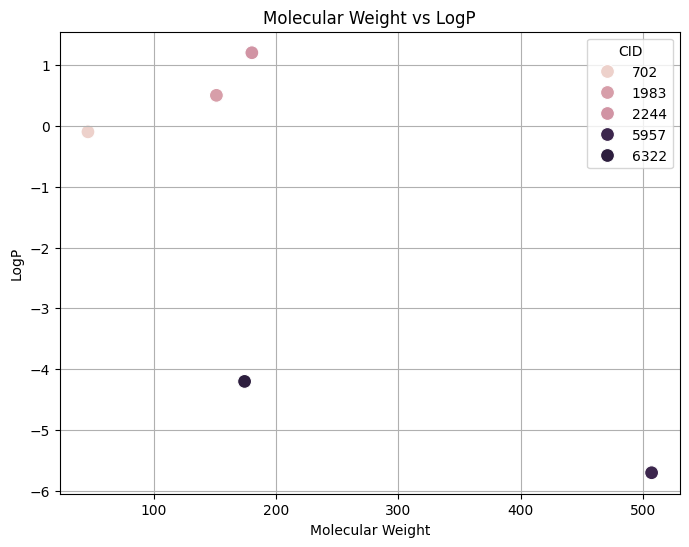

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="MolecularWeight", y="XLogP", hue="CID", s=100)
plt.title("Molecular Weight vs LogP")
plt.xlabel("Molecular Weight")
plt.ylabel("LogP")
plt.grid(True)
plt.show()

B. LogP vs Compound Name  (Plot XLogP vs Compound Name)

<ipython-input-23-b1f3d92b286a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x="CompoundName", y="XLogP", palette="coolwarm")


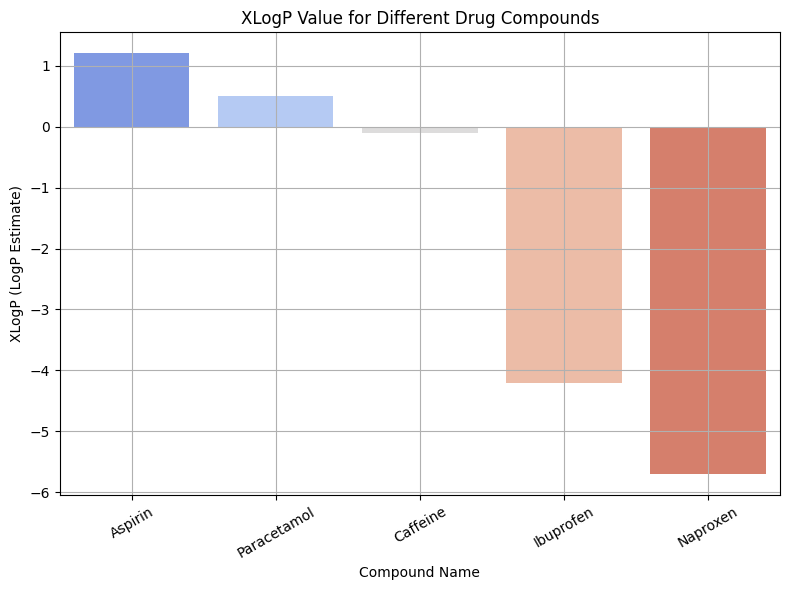

In [23]:

plt.figure(figsize=(8, 6))
sns.barplot(data=df_clean, x="CompoundName", y="XLogP", palette="coolwarm")
plt.title("XLogP Value for Different Drug Compounds")
plt.xlabel("Compound Name")
plt.ylabel("XLogP (LogP Estimate)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(True)
plt.show()

### 🧠 Bonus: Molecular Weight in Drug Design

Molecular weight (MW) is a critical factor in drug development. It influences:

- **Absorption and Permeability:** Lower MW compounds tend to cross biological membranes more easily.
- **Solubility:** Higher MW often correlates with reduced solubility, especially in water.
- **Metabolism and Elimination:** MW affects how drugs are metabolized and cleared from the body.

**Solvent Selection:**  
Drugs with high molecular weight may require specialized solvents or surfactants for formulation. Understanding MW helps pharmaceutical scientists choose solvents that maintain drug stability and improve bioavailability.
